## by: <font color='pink'>Sarah Saeed</font>

#  <font color='black'>What outlier is?</font> 
Outlier is something that is different from the crowd and have a different underlying behavior than the rest of the data. As per Wikipedia definition:
"it's an observation point that is distant from other points".

#  <font color='black'>Cause :</font> 
 Outliers can be a result of a mistake during data collection or they can be just an indication of variance in your data.


#  <font color='black'>Types :</font> 
##  <font color='purple'>Point or global outliers:</font> 
A data point is considered as global outlier if its value is far outside the entire of the dataset.

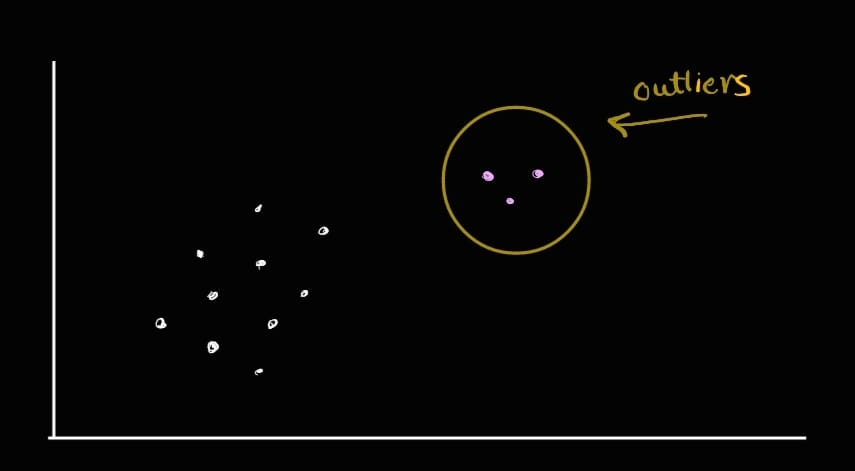

##  <font color='purple'>Contextual outliers:</font> 
A data point is considered as a contextual outlier if its value deviates quite a lot from the rest of the data points in the same context (or under the same condition).
- the same value may not be considered as an outlier if it occurs in a different context.
- Happens quite a lot in time series data.
- Example: raining in the summer can be considered as a contextual outlier, the event is anomalous compared to the seasonal patters(raining is most likely to happen in the winter).

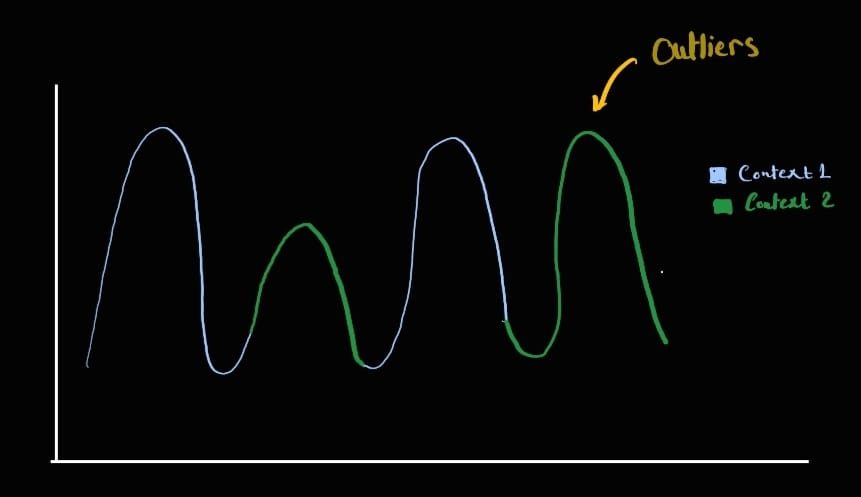

##  <font color='purple'>Collective outliers:</font> 
When a group of data points within a larger data set significantly different from the entire dataset, but the values of the individual data points are not themselves anomalous in either a contextual or global sense.

- Remarkable when two related time series combined together into a single anomaly. 


	
# <font color='black'>Outliers detection :</font>
## Can be visualized using box plots, histograms and scatter plots and many other things.
##   <font color='purple'>Outliers detection using the z-score function :</font>
#### It helps to understand if a data value is greater or smaller than the mean, specifically, it tells how many standard deviations away a data point is from the mean , if z score =2 then iam 2 std deviations away from the mean.
#### A Z-score is finding the distribution of data when mean is 0 and standard deviation is 1 (normal distribution) , that's why it's centered at zero and the x axis is increasing by 1 .
#### you can convert any distribution to the standard distribution , this process is called standarization and is done by : for every point --> subtract the mean and divide by the std.
#### Usually a threshold of 3 and -3 is used, if the z-score value is bigger than 3 or less than -3 , this point is considered as an outlier.

#### *and here's a simple example to understand the z-score fuction*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets 
import seaborn as sns
from scipy import stats 

In [12]:
nums=[1,2,2,2,3,1,1,15,1,1,4,5,6,7,1,2,3 , 4 , 4 , 4 , 6 , 5 ,4]
#calculate the mean and the standard deviation 
mean=np.mean(nums)
std=np.std(nums)
print('the mean is', mean,'and the standard deviation is',std)
threshold=3

#calculate the z-score for each element, if z>3, then it's an outlier

outliers=[]
for i in nums:
    z=(i-mean)/std
    if z>threshold:
        outliers.append(i)
print('the outliers are:',outliers)

the mean is 3.652173913043478 and the standard deviation is 3.016025251482543
the outliers are: [15]


C:\Users\antoz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

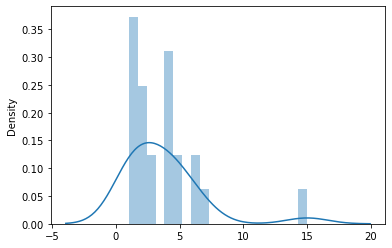

In [27]:
#plotting the histogram of the data may also help identifying your outliers
#the higher the value is the more common it's in the data
sns.distplot(nums,bins=20)

## <font color='purple'>Outliers detection using the IQR-score  :</font>
The inter-quartile range being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles.
**IQR=Q3-Q1**

So,how are the interquartiles represented,and where do they exist?
let's start first with something called a **Box plot**
A box plot is a statistical spread used for the visualization of data and includes: **1ST,2ND,3RD quartiles** plus **max** and **min**.
when reviewing a boxplot, an outlier is defined as a data point that located outside the whiskers of the box plot:
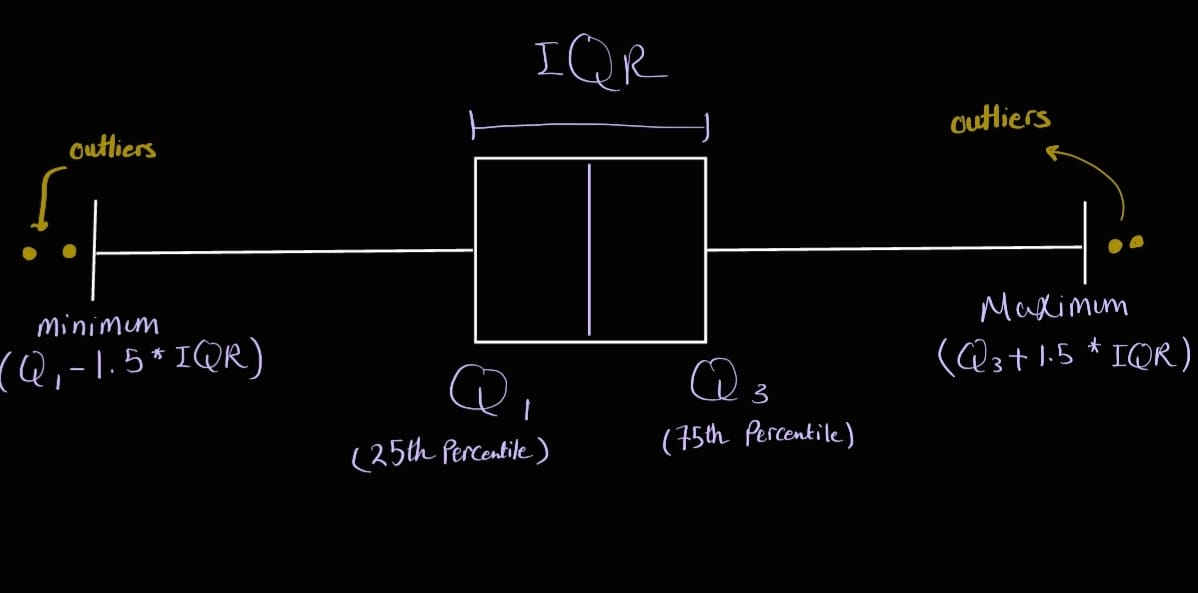



*and here's a simple example to understand the IQR method*

the First quartile is 2.5 and the Second quartile value is 4.0 and the Third quartile value is 5.5
the IQR value is 3.0
the upper limit is 10.0 and the lower limit is -2.0
the outliers: [50]


<ipython-input-29-d4e1c9e4de82>:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data, percent_for_q1 ,interpolation='midpoint')
<ipython-input-29-d4e1c9e4de82>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data, percent_for_q2 ,interpolation='midpoint')
<ipython-input-29-d4e1c9e4de82>:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percen

<AxesSubplot:>

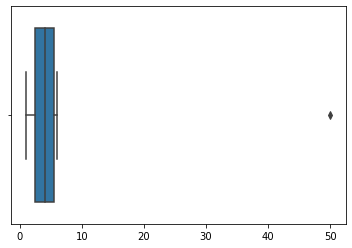

In [29]:
data=[6,2,3,4,5,1,50]
sort_data=np.sort(data)
percent_for_q1=25
percent_for_q2=50
percent_for_q3=75
#calculate the quartiles
Q1=np.percentile(data , percent_for_q1 )
Q2=np.percentile(data , percent_for_q2 )
Q3=np.percentile(data , percent_for_q3 )
print('the First quartile is',Q1,
     'and the Second quartile value is', Q2,
     'and the Third quartile value is',Q3)

IQR=Q3-Q1
print('the IQR value is', IQR)

#find the lower and upper limits
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print('the upper limit is', upper_limit, 'and the lower limit is',lower_limit)

#data points greater than the upper limit or smaller than the lower limit are outliers
outliers=[]
for i in data:
    if ((i>upper_limit) or (i<lower_limit)):
     outliers.append(i)
print('the outliers:', outliers)

#plot the boxplot to highlight the outliers
sns.boxplot(x=data)

# <font color='black'>Outliers detection and handling in real world datasets :</font>

 *we will work on boston housing price dataset from sklearn library*
 ## steps:
 - we will start with importing the required libraries  

-  we will upload the dataset into boston_df dataframe 

In [2]:
boston=datasets.load_boston(return_X_y= False)
boston_df=pd.DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- now we will use the boxplot method to check the outlier, and we will select any column

<AxesSubplot:xlabel='DIS'>

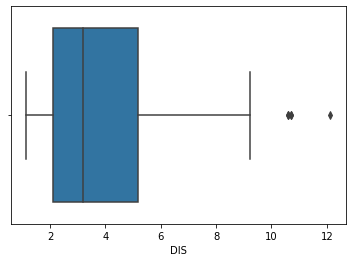

In [3]:
sns.boxplot(x=boston_df['DIS'])

<AxesSubplot:xlabel='DIS', ylabel='Count'>

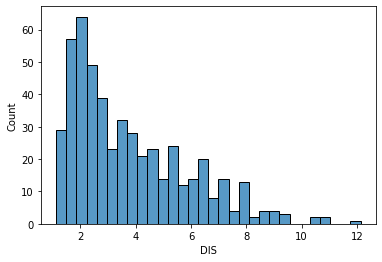

In [7]:
sns.histplot(boston_df['DIS'] , bins=30)

- As we don't have categorical value in our boston housing dataset and boxplots works better with categorical data, we will jump to the scatter plot

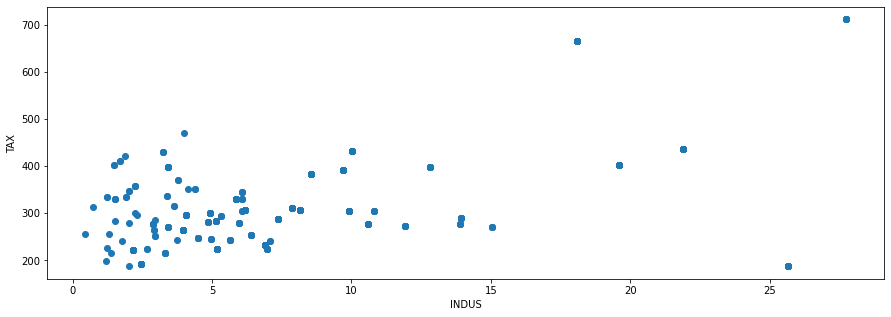

In [103]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(boston_df['INDUS'],boston_df['TAX'])
ax.set_xlabel('INDUS')
ax.set_ylabel('TAX')
plt.show()

what does **fig,ax** means?

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using **fig, ax = plt.subplots()** you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')).

# 1- <font color='violet'>use the z-score function </font>defined in scipy library to detect the outliers

In [106]:
z=np.abs(stats.zscore(boston_df))
z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302


- As we can see here, it's difficult to detect the outlier points, so we're going to set a threshold value and let's assume that it equels to **3** 

In [125]:
threshold=3
print(np.where(z>threshold))


(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

don't worry if you didn't get the output above, the first array represents the rows, and the second array represents the columns, and joining each of them together represent the outlier location.
for example: **z[102][11]** is and outlier, and we can make sure of that by checking the table below,
**B** has a value of 70.80 which is obvious that it deviates from the majority:

In [147]:
boston_df.iloc[102:110,:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
102,0.22876,0.0,8.56,0.0,0.52,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
103,0.21161,0.0,8.56,0.0,0.52,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
104,0.13960,0.0,8.56,0.0,0.52,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33
105,0.13262,0.0,8.56,0.0,0.52,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47
106,0.17120,0.0,8.56,0.0,0.52,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
107,0.13117,0.0,8.56,0.0,0.52,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09
108,0.12802,0.0,8.56,0.0,0.52,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
109,0.26363,0.0,8.56,0.0,0.52,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55


# Now, <font color='blue'> It's time to remove the outliers </font> 

In [196]:
clean_boston_df=boston_df
clean_boston_df=clean_boston_df[(z<3).all(axis=1)]
display(clean_boston_df.shape)

(415, 13)

So, after removing the Outlier our dataset will have 415 rows. **It means we have removed almost (506-415) 91 records from the dataset.**

Note that: **axis=1** means that we want to remove the outliers from all the columns 

# 2- <font color='violet'>Let's try the IQR </font>, using the quantile method to detect the outliers

In [197]:
Q1=boston_df.quantile(0.25)
#we can say: Q1=np.percentile(boston_df,25,interpolation='midpoint')
Q3=boston_df.quantile(0.75)
#we can say: Q1=np.percentile(boston_df,75,interpolation='midpoint')
IQR=Q3-Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

- Now, we will print the dataframe value, **TRUE** means an outlier

In [171]:
display(((boston_df<Q1-1.5*IQR))|(boston_df>Q3+1.5*IQR) )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


#  <font color='blue'> Time to remove the outliers </font> 

In [194]:
clean_iqr_boston = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_iqr_boston.shape

(274, 13)

Note that: With the Z-score we were able to drop 91 rows but with IQR we have dropped 232 rows.